In [40]:
import numpy as np
from tensorflow.keras.datasets import reuters
np.random.seed(777)
from keras import models
from keras import layers

In [6]:
import tensorflow as tf
tf.random.get_seed(1000)

(87654321, 1000)

In [8]:
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

In [11]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[1]])

In [12]:
decoded_newswire

'? generale de banque sa lt ? br and lt heller overseas corp of chicago have each taken 50 pct stakes in ? company sa ? factors generale de banque said in a statement it gave no financial details of the transaction sa ? ? turnover in 1986 was 17 5 billion belgian francs reuter 3'

In [27]:
reverse_word_index.get(4)

'in'

In [19]:
train_data[1][0]

1

In [28]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 훈련 데이터 벡터 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터 벡터 변환
x_test = vectorize_sequences(test_data)

In [34]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)
print(train_data.ndim)
print(train_labels.ndim)
print(test_data.ndim)
print(test_labels.ndim)

(8982,)
(8982,)
(2246,)
(2246,)
1
1
1
1


In [29]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

Using TensorFlow backend.


In [38]:
one_hot_train_labels.ndim

2

In [39]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [42]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [43]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 291us/step - loss: 2.6939 - acc: 0.5055 - val_loss: 1.7496 - val_acc: 0.6500
Epoch 2/20
7982/7982 [==============================] - 1s 183us/step - loss: 1.4434 - acc: 0.7050 - val_loss: 1.2914 - val_acc: 0.7160
Epoch 3/20
7982/7982 [==============================] - 2s 193us/step - loss: 1.0597 - acc: 0.7780 - val_loss: 1.1155 - val_acc: 0.7610
Epoch 4/20
7982/7982 [==============================] - 2s 215us/step - loss: 0.8315 - acc: 0.8246 - val_loss: 1.0182 - val_acc: 0.7800
Epoch 5/20
7982/7982 [==============================] - 2s 212us/step - loss: 0.6624 - acc: 0.8567 - val_loss: 0.9665 - val_acc: 0.7910
Epoch 6/20
7982/7982 [==============================] - 2s 210us/step - loss: 0.5283 - acc: 0.8899 - val_loss: 0.9412 - val_acc: 0.7920
Epoch 7/20
7982/7982 [==============================] - 2s 212us/step - loss: 0.4233 - a

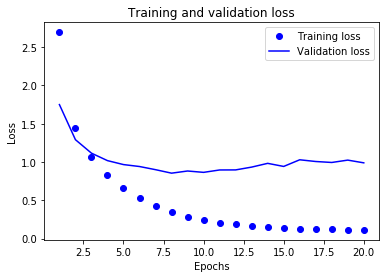

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [47]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 270us/step - loss: 2.4921 - acc: 0.5388 - val_loss: 1.6609 - val_acc: 0.6560
Epoch 2/9
7982/7982 [==============================] - 2s 195us/step - loss: 1.3655 - acc: 0.7095 - val_loss: 1.2740 - val_acc: 0.7250
Epoch 3/9
7982/7982 [==============================] - 2s 208us/step - loss: 1.0175 - acc: 0.7825 - val_loss: 1.1160 - val_acc: 0.7670
Epoch 4/9
7982/7982 [==============================] - 2s 204us/step - loss: 0.7985 - acc: 0.8309 - val_loss: 1.0219 - val_acc: 0.7750
Epoch 5/9
7982/7982 [==============================] - 2s 207us/step - loss: 0.6331 - acc: 0.8662 - val_loss: 0.9474 - val_acc: 0.7940
Epoch 6/9
7982/7982 [==============================] - 2s 205us/step - loss: 0.5029 - acc: 0.8950 - val_loss: 0.9241 - val_acc: 0.8010
Epoch 7/9
7982/7982 [==============================] - 2s 207us/step - loss: 0.4035 - acc: 0.9148 - val_loss: 0.8928 - val_acc: 0.8110
Epoch 8

In [49]:
predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [50]:
np.sum(predictions[0])

0.9999998

In [51]:
np.argmax(predictions[0])

3

In [53]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 447us/step - loss: 1.8996 - acc: 0.6106 - val_loss: 1.2678 - val_acc: 0.7190
Epoch 2/20
7982/7982 [==============================] - 2s 275us/step - loss: 0.9691 - acc: 0.7869 - val_loss: 1.0139 - val_acc: 0.7690
Epoch 3/20
7982/7982 [==============================] - 2s 285us/step - loss: 0.6379 - acc: 0.8658 - val_loss: 0.8854 - val_acc: 0.8100
Epoch 4/20
7982/7982 [==============================] - 2s 283us/step - loss: 0.4372 - acc: 0.9082 - val_loss: 0.8627 - val_acc: 0.8240
Epoch 5/20
7982/7982 [==============================] - 2s 284us/step - loss: 0.3155 - acc: 0.9308 - val_loss: 0.8644 - val_acc: 0.8220
Epoch 6/20
7982/7982 [==============================] - 2s 286us/step - loss: 0.2470 - acc: 0.9439 - val_loss: 0.8873 - val_acc: 0.8160
Epoch 7/20
7982/7982 [==============================] - 2s 297us/step - loss: 0.2046 - acc: 0.9494 - val_loss: 0.9733 - val_acc: 0.8040
